In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
path = 'https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv'
wine = pd.read_csv(path)
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
cols2drop = ['class_label', 'class_name']
features = wine.drop(cols2drop, axis=1)
print(wine.shape)
print(features.shape)

(178, 15)
(178, 13)


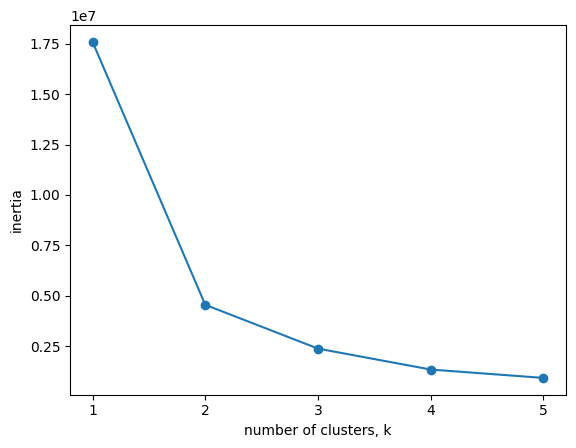

In [12]:
k = range(1, 6)
inertias = []
for ks in k:
    model = KMeans(n_clusters=ks, n_init=10)
    model.fit(features)
    inertias.append(model.inertia_)
    
# Plot n_clusters vs inertias
plt.plot(k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

In [16]:
# since there are 3 categories of wine, so we take 3 number of clusters
model = KMeans(n_clusters=3)
labels = model.fit_predict(features)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
# now let's build the crosstab
df = pd.DataFrame({'labels': labels, 'wine_categories': wine['class_name'].to_list()})
ct = pd.crosstab(df['labels'], df['wine_categories'])
print(ct)

wine_categories  Barbera  Barolo  Grignolino
labels                                      
0                     19       0          50
1                      0      46           1
2                     29      13          20


It's not clear to see wine category belong to which cluster label. It's because the features in our wine dataset are not scaled or standardized.

In [24]:
print(features.var())

alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64


It's evident to see how **proline** feature has such a high variance compared to **od280**. Let's visualize their comparitive distribution with a scatter plot.

(-1000.0, 1000.0)

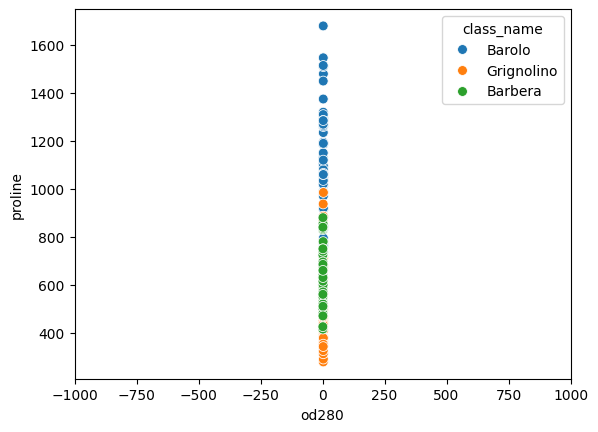

In [51]:
sns.scatterplot(x='od280', y='proline', data=wine, hue='class_name', s=50)
plt.xlim([-1000, 1000])

<Axes: xlabel='malic_acid', ylabel='proline'>

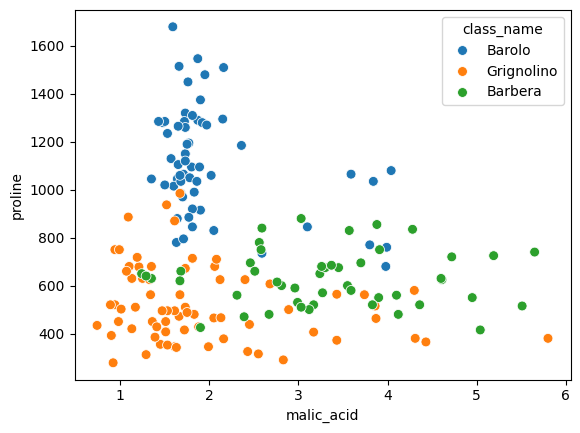

In [54]:
sns.scatterplot(x='malic_acid', y='proline', data=wine, hue='class_name', s=50)

We can view that the clusters are not distinuishable by the scatterplots above. Hence, we need to transform our features to standardized data.

In [40]:
scaler = StandardScaler()
model = KMeans(n_clusters=3, n_init=10)

pipeline = make_pipeline(scaler, model)
pipeline.fit(features)
labels = pipeline.predict(features)

Now let's check the clusters via cross-tabulation.

In [41]:
df_transformed = pd.DataFrame({'labels': labels, 'wine_type': wine['class_name'].to_list()})
ct = pd.crosstab(df_transformed['labels'], df_transformed['wine_type'])
print(ct)

wine_type  Barbera  Barolo  Grignolino
labels                                
0               48       0           3
1                0      59           3
2                0       0          65


After transformed data, the clustered samples are clearly identifiable.

In [57]:
scaled_data = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns.to_list())

<Axes: xlabel='malic_acid', ylabel='proline'>

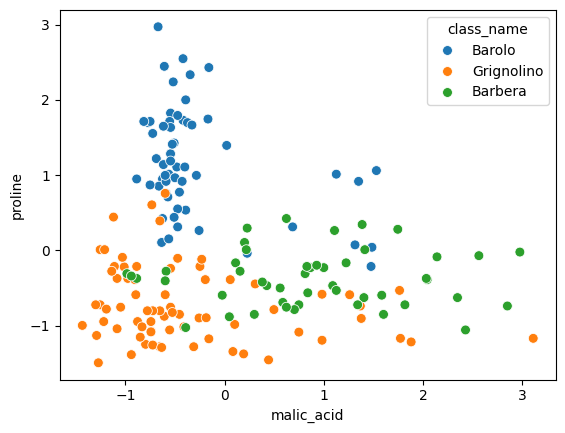

In [58]:
sns.scatterplot(x='malic_acid', y='proline', data=scaled_df, hue=wine['class_name'], s=50)